In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [20]:
# About this file
# 1. longitude: A measure of how far west a house is; a higher value is farther west
# 2. latitude: A measure of how far north a house is; a higher value is farther north
# 3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
# 4. totalRooms: Total number of rooms within a block
# 5. totalBedrooms: Total number of bedrooms within a block
# 6. population: Total number of people residing within a block
# 7. households: Total number of households, a group of people residing within a home unit, for a block
# 8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
# 9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
# 10. oceanProximity: Location of the house w.r.t ocean/sea

df = pd.read_csv('housing.csv')
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


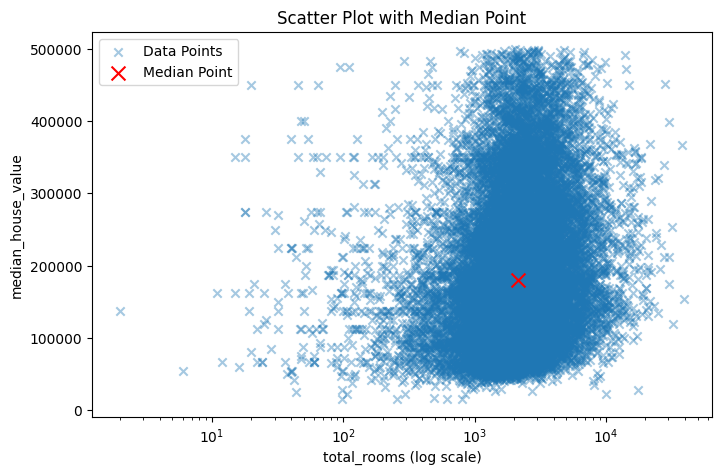

In [21]:
median_x = np.median(df['total_rooms'])
median_y = np.median(df['median_house_value'])

df_filtered = df[df['median_house_value'] < 500000]

plt.figure(figsize=(8, 5))
plt.scatter(df_filtered['total_rooms'], df_filtered['median_house_value'], 
            alpha=0.4, marker='x', label='Data Points')
plt.xscale('log')


# 3. Plot the median point on top, 5x the size, in red
plt.scatter(median_x, median_y, 
            color='red', 
            marker='x', 
            s=100,  # adjust as needed
            label='Median Point')

# 4. Add labels, legend, and show
plt.xlabel('total_rooms (log scale)')
plt.ylabel('median_house_value')
plt.title('Scatter Plot with Median Point')
plt.legend()
plt.show()

> Note: 

1. value is independent of total rooms
2. total rooms seems to be clusterd at 10^3
3. value seems to be clusterd at 200_000

In [ ]:
# np.unique(df['housing_median_age'], return_counts=True)

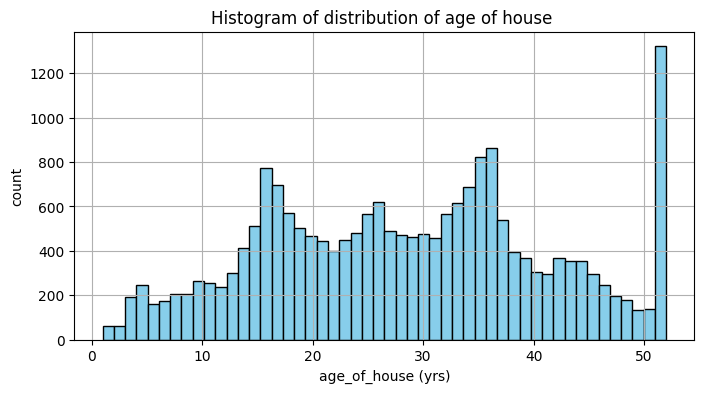

In [44]:
plt.figure(figsize=(8,4))
plt.grid(True)
plt.hist(df['housing_median_age'], bins =50, color='skyblue', edgecolor='black')
plt.xlabel('age_of_house (yrs)')
plt.ylabel('count')
plt.title('Histogram of distribution of age of house ')
plt.show()

> note:

1. Majoritority of the houses are 52 years old. others are normally distributed.

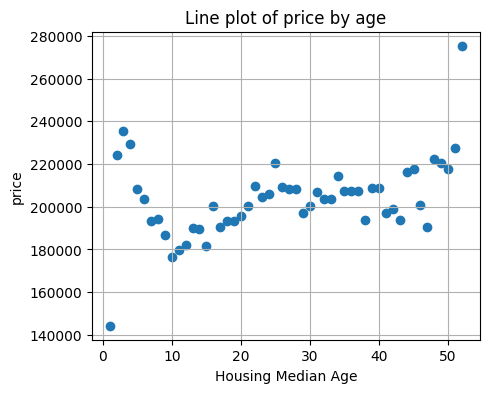

In [24]:
agg_data = df.groupby('housing_median_age')['median_house_value'].mean().reset_index()

plt.figure(figsize=(5, 4))
plt.scatter(agg_data['housing_median_age'], agg_data['median_house_value'], marker='o', linestyle='-')
plt.xlabel('Housing Median Age')
plt.ylabel('price')
plt.title('Line plot of price by age')
plt.grid(True)
plt.show()

> Questions:

why are the old houses so expensive?
- maybe plot the 52 year houses on the map and see if they are near the beach? 
- maybe they are old becuase its in important location and hard to demolish?


- what is the population distribution of the old houses? more pop = more expensive?


Ans: Because they are either in san fransisco, la, or sd

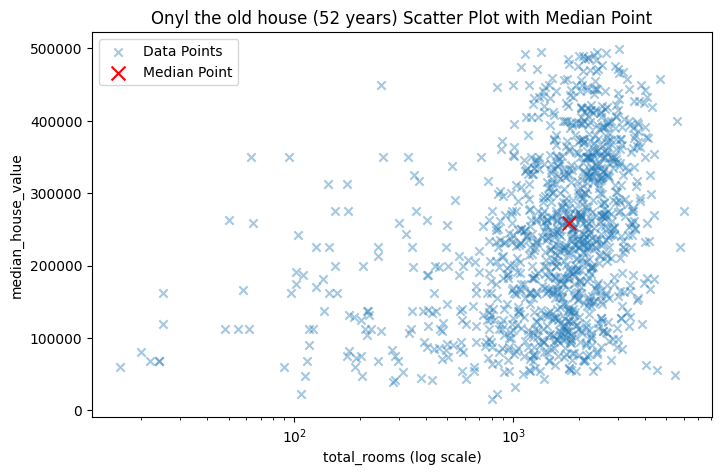

In [51]:
intresting_df = df[df["housing_median_age"] == 52]

median_x = np.median(intresting_df['total_rooms'])
median_y = np.median(intresting_df['median_house_value'])

df_filtered = intresting_df[intresting_df['median_house_value'] < 500000]

plt.figure(figsize=(8, 5))
plt.scatter(df_filtered['total_rooms'], df_filtered['median_house_value'], 
            alpha=0.4, marker='x', label='Data Points')
plt.xscale('log')


# 3. Plot the median point on top, 5x the size, in red
plt.scatter(median_x, median_y, 
            color='red', 
            marker='x', 
            s=100,  # adjust as needed
            label='Median Point')

# 4. Add labels, legend, and show
plt.xlabel('total_rooms (log scale)')
plt.ylabel('median_house_value')
plt.title('Onyl the old house (52 years) Scatter Plot with Median Point')
plt.legend()
plt.show()

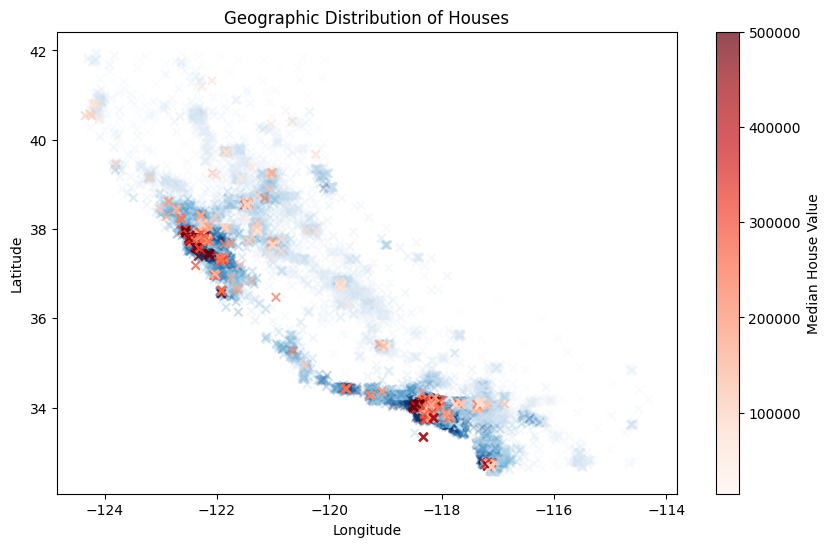

In [60]:
# 1. Geographic Scatter Plot (Longitude vs. Latitude)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['longitude'], df['latitude'], 
                      c=df['median_house_value'], cmap='Blues', alpha=0.2, marker='x')

scatter = plt.scatter(intresting_df['longitude'], intresting_df['latitude'], 
                      c=intresting_df['median_house_value'], cmap='Reds', alpha=0.7, marker='x')

plt.colorbar(scatter, label='Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographic Distribution of Houses')
plt.show()

Age is city dependent (or age more means its probably in a city) so more expensive

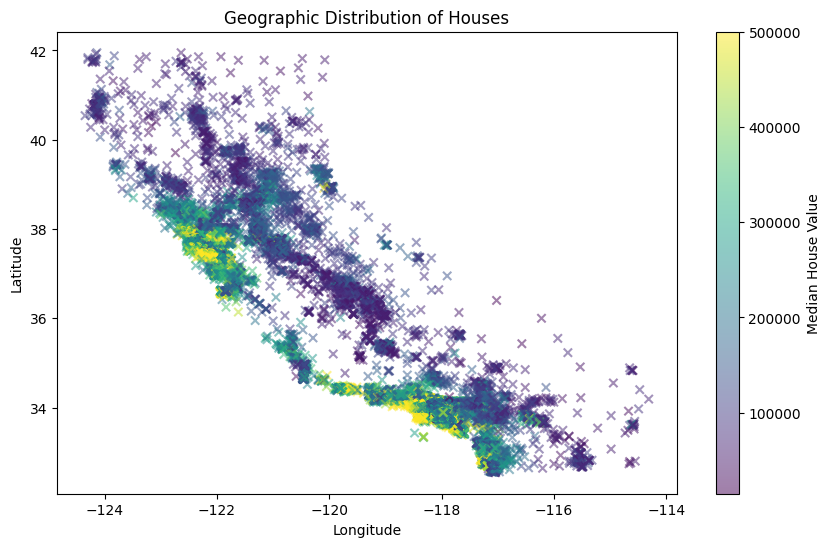

In [68]:
# 1. Geographic Scatter Plot (Longitude vs. Latitude)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['longitude'], df['latitude'], 
                      c=df['median_house_value'], cmap='viridis', alpha=0.5, marker='x')

plt.colorbar(scatter, label='Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographic Distribution of Houses')
plt.show()

Coast is more pricy

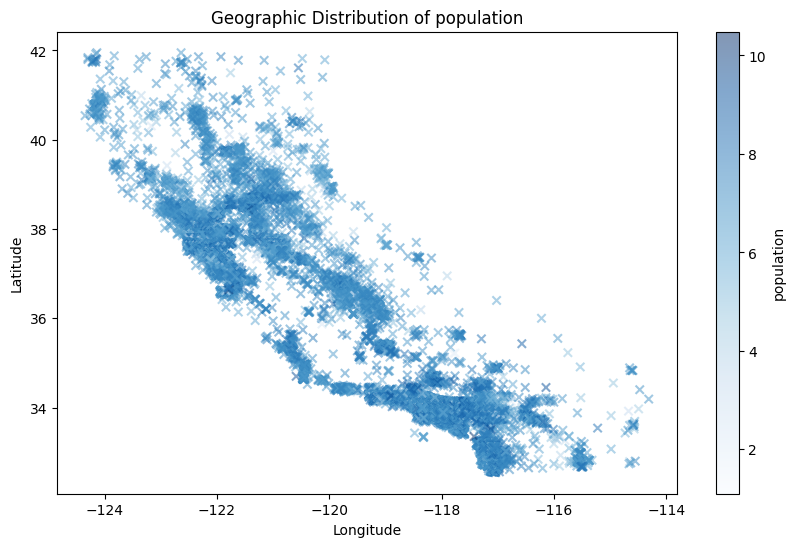

In [101]:
# 1. Geographic Scatter Plot (Longitude vs. Latitude)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['longitude'], df['latitude'], 
                      c=np.log(df['population']), cmap='Blues', alpha=0.5, marker='x')

# sns.kdeplot(x=df['longitude'], y=df['latitude'], cmap="Reds", fill=True, thresh=0.05, alpha=0.5)
plt.colorbar(scatter, label='population')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographic Distribution of population')
plt.show()

THe popution are mostly low number, like 1000s of them only the city are extremely higly populated. that is why the count is very squed to the city. Meaning it is not evenly distributed. or you can say that the city is very dense in proportion.

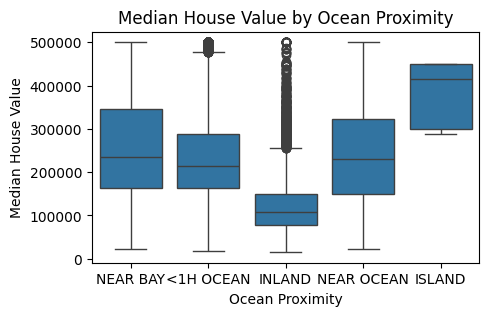

In [91]:
# 3. Box Plot: Median House Value by Ocean Proximity
plt.figure(figsize=(5, 3))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=df)
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.title('Median House Value by Ocean Proximity')
plt.show()

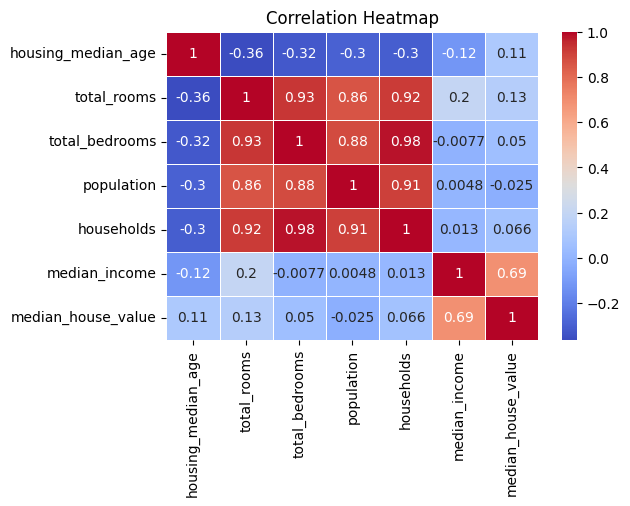

In [93]:

# 4. Correlation Heatmap for Selected Numerical Variables
num_cols = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
corr = df[num_cols].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()